# 1. 登陆账户获取账户余额

In [ ]:
import okx.Account as Account

flag = "1" # live trading:0 , demo trading: 1
api_key = "8da5d3ad-7554-424e-a1c2-bfcead40dcdd"
secret_key = "E086EDAC65DF1E55DA72CA2483327CA2"
IP = ""
passphrase = "lxc123@LXC"
Permissions = "Read/Withdraw/Trade"
accountAPI = Account.AccountAPI(api_key, secret_key, passphrase, False, flag)
result = accountAPI.get_account_balance()
print("账户余额: {}".format(result))

# 2. 获取K线图

In [14]:
import okx.MarketData as MarketData
import pandas as pd
import numpy as np

flag = "1"  # live trading:0 , demo trading: 1
marketDataAPI = MarketData.MarketAPI(flag=flag)
result = marketDataAPI.get_candlesticks(instId='BTC-USD-SWAP')
# print(type(result['data']))
df = pd.DataFrame(result['data'])
k_data = df.iloc[:, 0:6].copy()
k_data.rename(columns={0:'datetime', 1:'Open',2:'High',3:'Low',4:'Close', 5:'Volume'}, inplace=True)

k_data['datetime'] = pd.DatetimeIndex(pd.to_datetime(k_data['datetime'], unit='ms')).tz_localize('UTC' ).tz_convert('Asia/Shanghai')
k_data['datetime'] = pd.to_datetime(k_data['datetime'], format='%Y-%m-%d')
k_data.set_index('datetime', inplace=True)
k_data = k_data.astype({'Open': 'float',
                        'High': 'float',
                        'Low': 'float',
                        'Close': 'float',
                        'Volume': 'int'})

header:  {'Content-Type': 'application/json', 'x-simulated-trading': '1'}
domain: https://www.okx.com
url: /api/v5/market/candles?instId=BTC-USD-SWAP


In [15]:
k_data

,Open,High,Low,Close,Volume
datetime,,,,,
2023-04-13 21:30:00+08:00,30284.5,30286.5,30282.0,30282.0,1881
2023-04-13 21:29:00+08:00,30266.1,30292.6,30266.1,30285.5,22836
2023-04-13 21:28:00+08:00,30251.8,30264.9,30251.8,30264.9,11759
2023-04-13 21:27:00+08:00,30255.3,30265.2,30252.5,30252.5,5352
2023-04-13 21:26:00+08:00,30252.0,30264.0,30252.0,30256.8,5069
...,...,...,...,...,...
2023-04-13 19:55:00+08:00,30207.1,30207.1,30198.8,30198.8,369
2023-04-13 19:54:00+08:00,30221.2,30221.2,30207.9,30207.9,790
2023-04-13 19:53:00+08:00,30218.4,30219.9,30218.4,30219.9,1309


# 3. 用MACD指标进行交易

0


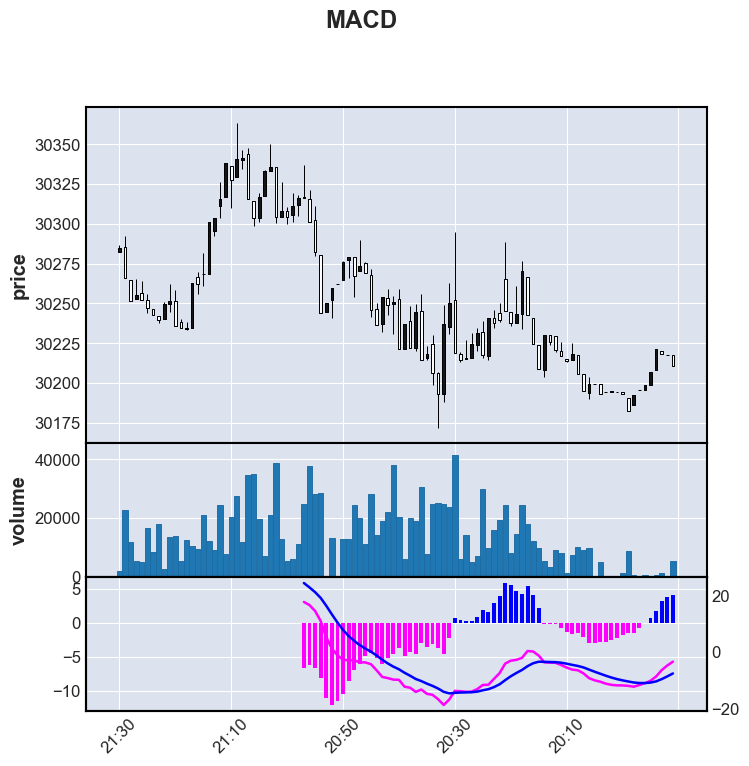

In [17]:
from trend_following.macd import MACD_following

decision = MACD_following(k_data)
print(decision)

from utils.draw_figs import K_candle_plot_MACD

K_candle_plot_MACD(k_data)